## Diagnostic tests for MOOC item response matrices

In [1]:
# Standard library imports
import os
from collections import defaultdict

In [2]:
# Data analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

### Pre-processing
Retrieve list of courses. Define measure names. Read in CSVs for all course-measure pairs.

In [3]:
# Data directories-- may need to adjust these
home = os.path.expanduser('~')
data_dir = home + "/Code/irt/data/"
course_list_dir = "done_courses.txt"

# Read in course list
courses = []
with open(data_dir + course_list_dir) as c_list:
    for course in c_list:
        courses.append(course.replace('/', '_').rstrip())

# Measures computed
measures = ['first_view', 'first_attempt', 'last_attempt', 'time_to_first_attempt', 'time_to_last_attempt',
            'time_spent_attempting', 'n_attempts', 'first_grade', 'last_grade']

# Data-framed CSVs of computed measures
data = defaultdict(dict)
for course in courses:
    for measure in measures:
        data[course][measure] = pd.read_csv(data_dir + "/exports/%s/%s.csv" % (course, measure), index_col=0)

/Users/vpoluser/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (22,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Test 1: Earlier problems are viewed more

First, we want to sanity check our first_view data against a total ordering of the items.

We'd expect to see a relatively smooth (but not necessarily monotonic) decrease in the attempt count as we progress through the course.



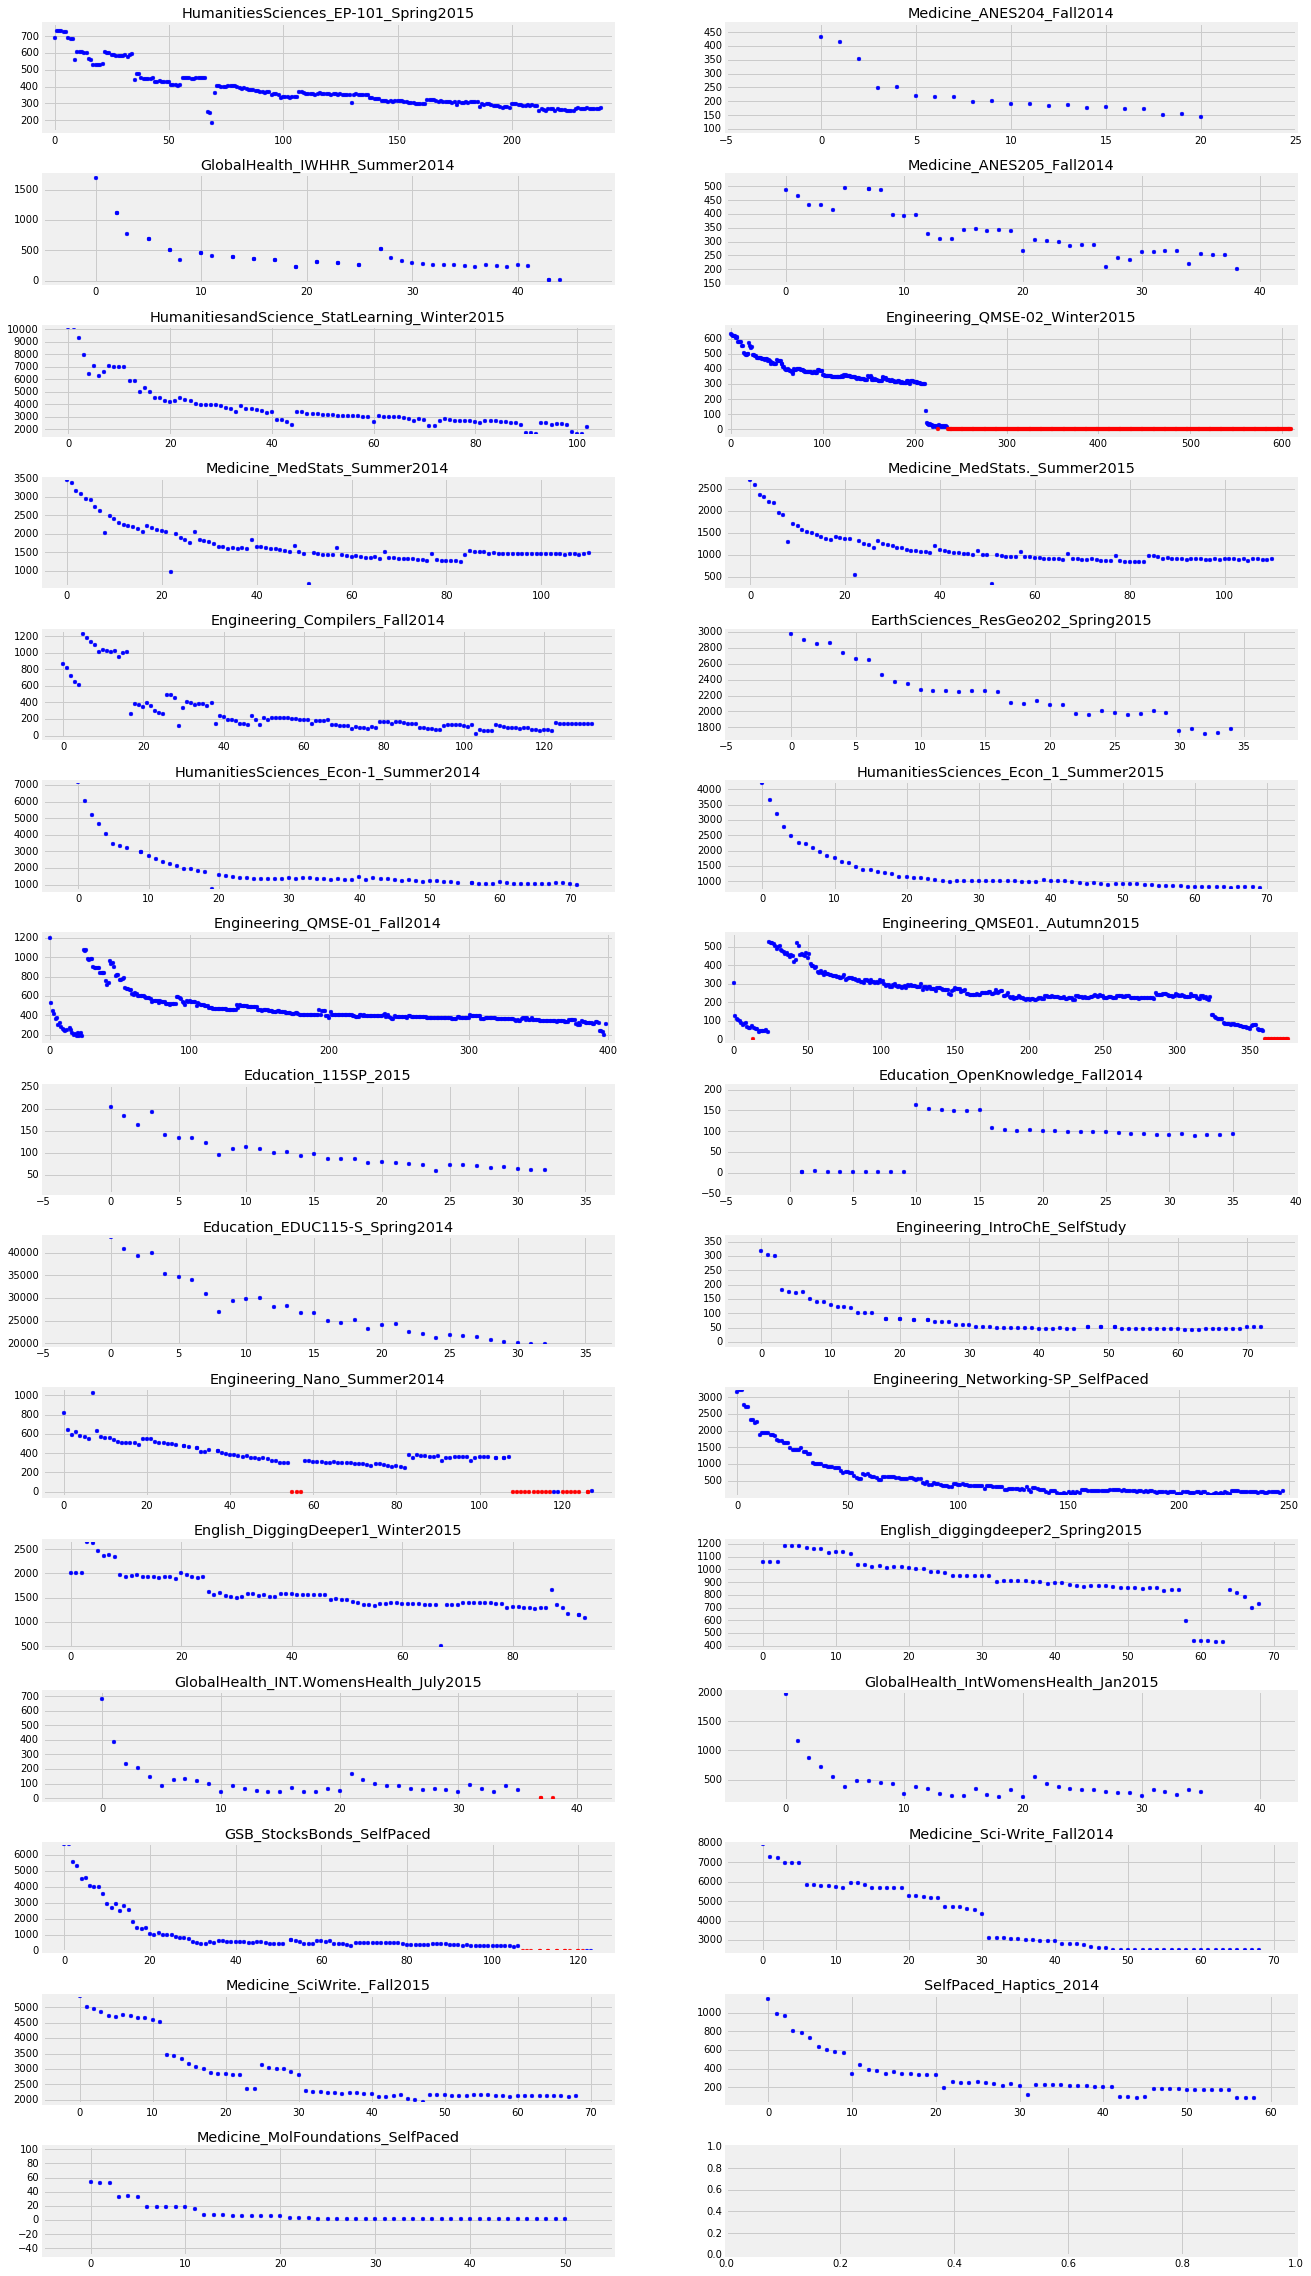

In [4]:
# Set up plots
cols = 2
fig, axes = plt.subplots(nrows=(len(courses)+1)/cols, ncols=cols)
fig.set_figheight(40)
fig.set_figwidth(20)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

for idx, course in enumerate(courses):
    # Get total number of learners who saw each item and ordering of items in the course
    fv = data[course]['first_view']
    view_counts = fv.count().sort_values(ascending=False)
    item_metadata = pd.read_csv(data_dir + "/raws/%s_ProblemMetadata.csv" % course, index_col = 0)
    
    # Add attempt count to metadata for each item
    ncol = {}  # Column for attempt counts
    zeros = {}  # Also track unobserved items
    for item in item_metadata.index:
        iuri = [pid for pid in view_counts.keys() if item in pid]
        if not iuri:
            zeros[item] = 1
            continue
        ncol[item] = view_counts[iuri[0]]
    item_metadata['view_count'] = pd.Series(ncol, item_metadata.index)
    item_metadata['zeros'] = pd.Series(zeros, item_metadata.index)
    
    # Add numerical rank to metadata for each item
    rank = {}
    r = 0
    for item in item_metadata.index:
        rank[item] = r
        r += 1
    item_metadata['total_order'] = pd.Series(rank, item_metadata.index)
    
    # Plot item order in course against number of learners who viewed each item or unobserved indicator
    ordering = item_metadata['total_order']
    views = item_metadata['view_count']
    unobserved = item_metadata['zeros']
    subp = axes[idx/2,int(idx%2!=0)]
    subp.set_title(course)
    subp.scatter(x=ordering, y=views, s=14, color='b')
    subp.scatter(x=ordering, y=unobserved, s=14, color='r')
    xdelt = 5
    ydelt = 50
    subp.set_xlim(-xdelt, ordering.max()+xdelt)
    subp.set_ylim(views.min()-ydelt, views.max()+ydelt)

### Test 2: No negative time deltas

The time_to_first_attempt (TTFA) and time_to_last_attempt (TTLA) matrices should not contain any negative numbers.

Additionally, the difference between TTLA and TTFA (DIFF) should itself be not negative.

In [5]:
for course in courses:
    print course
    
    ttfa = data[course]['time_to_first_attempt']
    ttfa_neg = ttfa.mask(ttfa >= 0).dropna(how='all')
    ttfa_issues = ttfa_neg.count().sum()
    print "\t TTFA: " + str(ttfa_issues)
    
    ttla = data[course]['time_to_last_attempt']
    ttla_neg = ttla.mask(ttla >= 0).dropna(how='all')
    ttla_issues = ttla_neg.count().sum()
    print "\t TTLA: " + str(ttla_issues)
    
    diff = ttla - ttfa
    diff_neg = diff.mask(diff >= 0).dropna(how='all')
    diff_issues = diff_neg.count().sum()
    print "\t DIFF: " + str(diff_issues)

HumanitiesSciences_EP-101_Spring2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Medicine_ANES204_Fall2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
GlobalHealth_IWHHR_Summer2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Medicine_ANES205_Fall2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
HumanitiesandScience_StatLearning_Winter2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Engineering_QMSE-02_Winter2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Medicine_MedStats_Summer2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Medicine_MedStats._Summer2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Engineering_Compilers_Fall2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
EarthSciences_ResGeo202_Spring2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
HumanitiesSciences_Econ-1_Summer2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
HumanitiesSciences_Econ_1_Summer2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Engineering_QMSE-01_Fall2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Engineering_QMSE01._Autumn2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Education_115SP_2015
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Education_OpenKnowledge_Fall2014
	 TTFA: 0
	 TTLA: 0
	 DIFF: 0
Education_ED

### Test 3: Learners take items in order

For each course, select a random subsample of learners and plot first_view time against rank order for each item.

May not be a clear association in all courses-- ideally some will show as monotonically non-decreasing (that is, up and to the right with some plateaus), and some might show as relatively flat. Especially in a self-paced course, a course with low item count, or any other course where all items might have been released at once, the difference might be hard to see.

At minimum, the graphs shouldn't be random or monotonically decreasing.

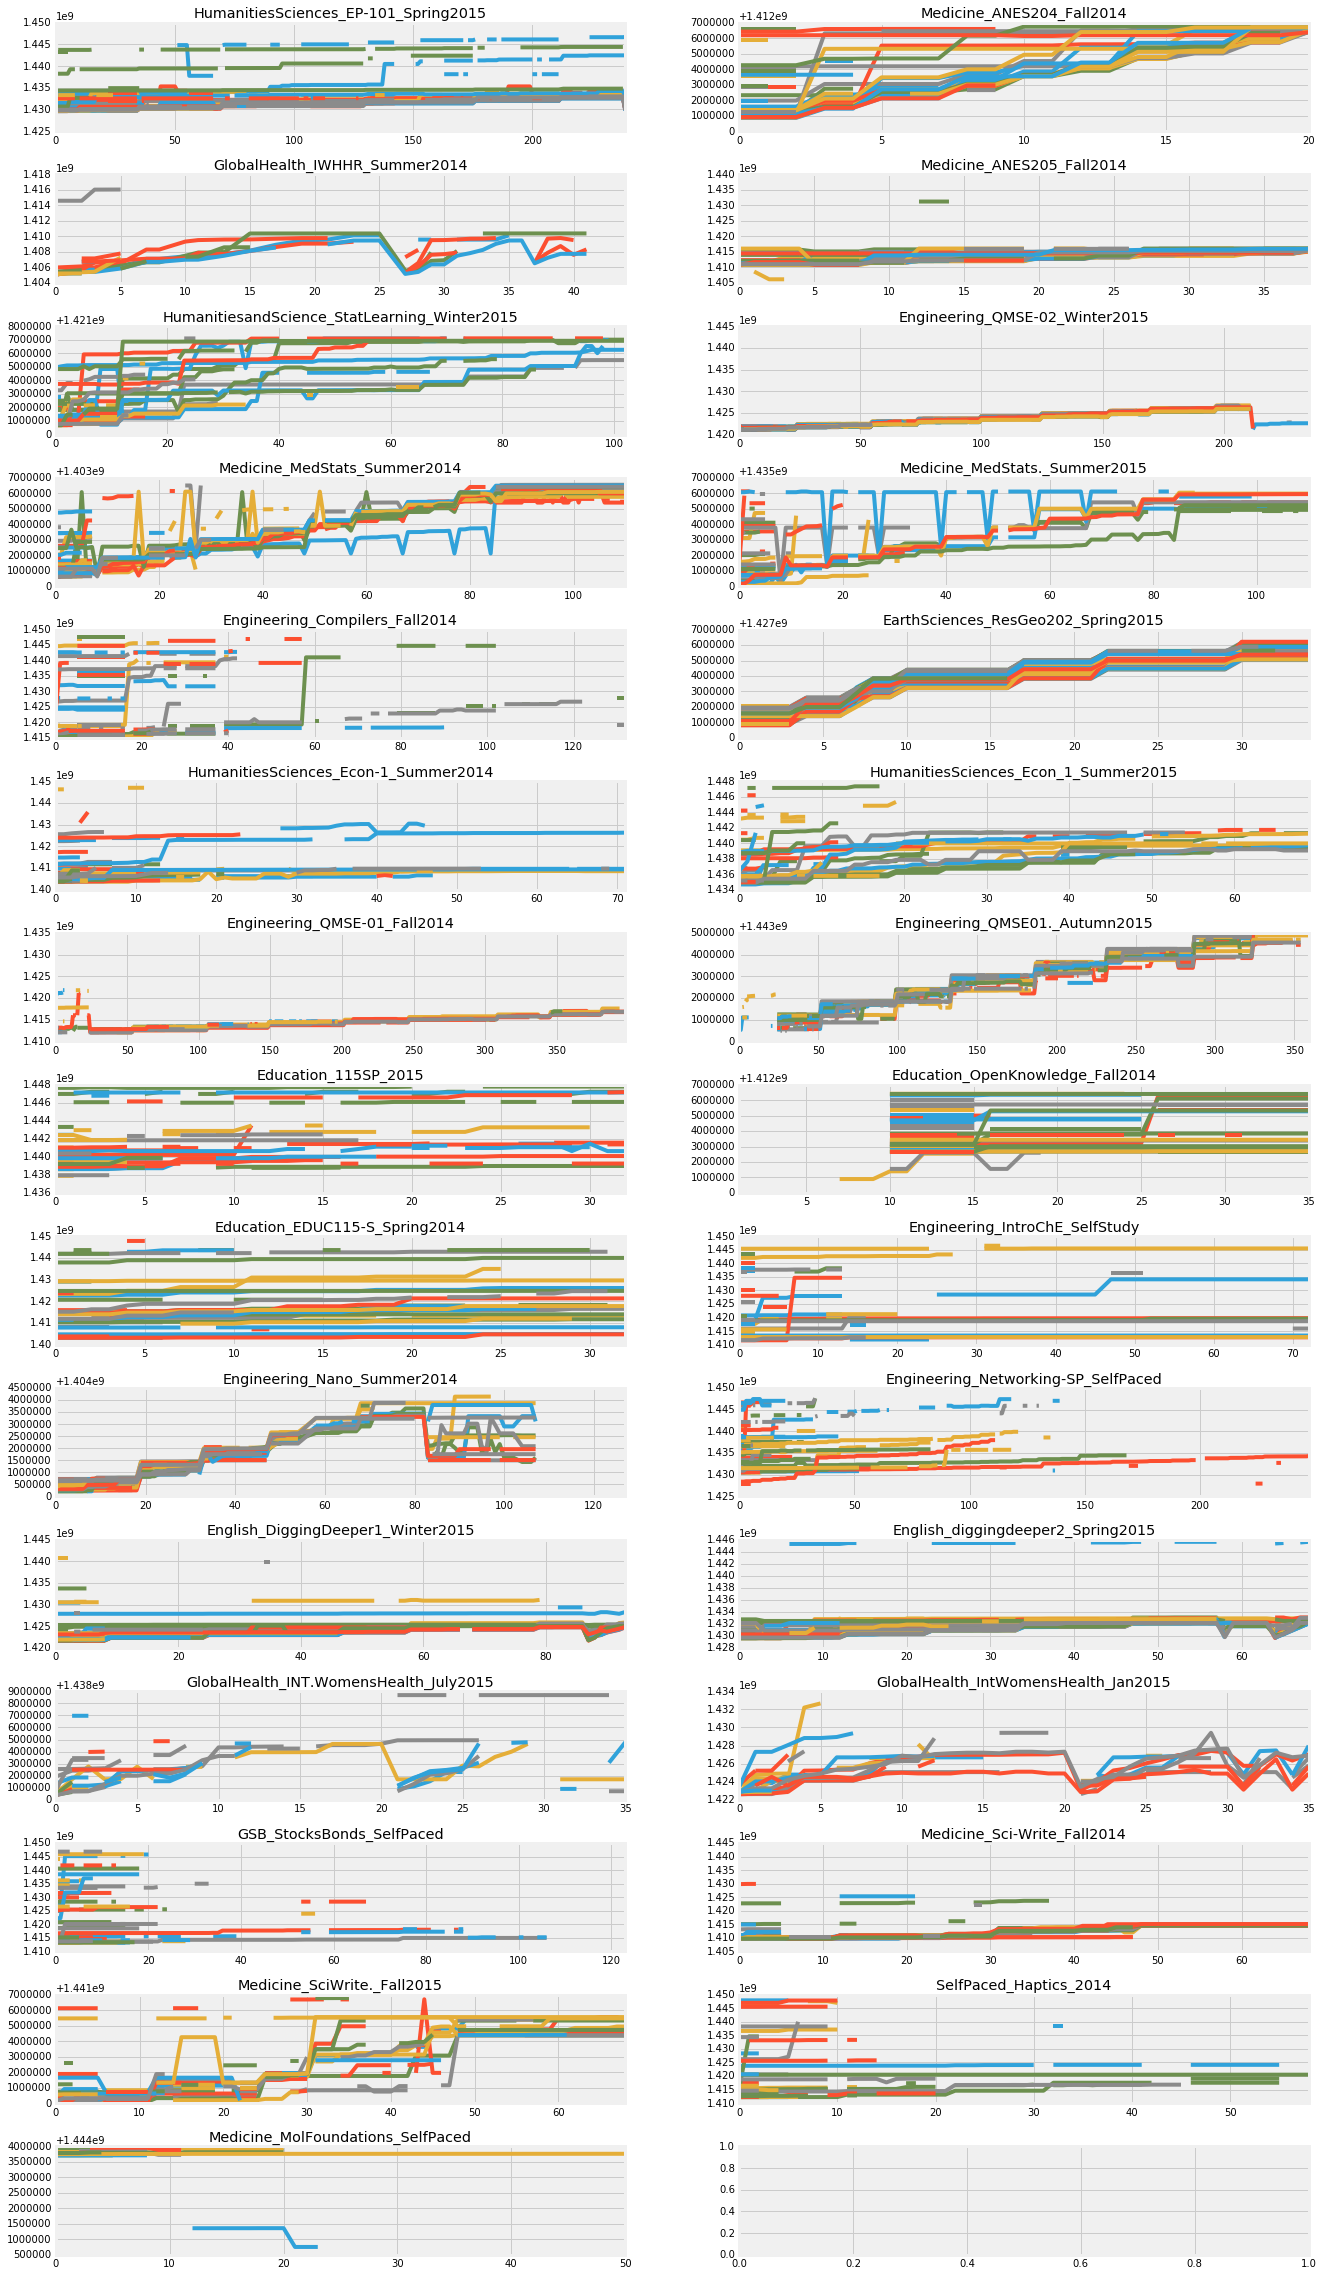

In [6]:
# Set up plots
cols = 2
fig, axes = plt.subplots(nrows=(len(courses)+1)/cols, ncols=cols)
fig.set_figheight(40)
fig.set_figwidth(20)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Define sample size and rng seed
sample_size = 50
sample_seed = 0

for idx, course in enumerate(courses):
    # Derive item rank
    item_metadata = pd.read_csv(data_dir + "/raws/%s_ProblemMetadata.csv" % course, index_col = 0)
    rank = {}
    for idxb, item in enumerate(item_metadata.index):
        rank[item] = idxb
    item_metadata['total_order'] = pd.Series(rank, item_metadata.index)
    
    # Order view times by item rank
    fv_sample = data[course]['first_view'].sample(n=sample_size, random_state=sample_seed)
    fv_sample.rename(columns=lambda x: rank[x[-36:-4]], inplace=True)
    fv_sample.sort_index(axis=1, inplace=True)
    
    # Plot each learner
    for i in range(sample_size):
        row = fv_sample.iloc[i]
        row.plot(ax=axes[idx/2,int(idx%2!=0)])
        axes[idx/2,int(idx%2!=0)].set_title(course)
    